In [7]:
import gensim
import os

In [8]:
projectDir = '/home/arpit/Desktop/nlp_project/Resume-Scoring-using-NLP-master/Extraction-of-Skills-master/'
modelDir = projectDir + 'models/'
os.chdir(modelDir)

model = gensim.models.Word2Vec.load("model_skill_extraction")

In [11]:
Z = model.wv.syn0
print(Z[0].shape)
Z[0]

AttributeError: 'KeyedVectors' object has no attribute 'syn0'

In [4]:
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;
import pandas as pd;
import numpy as np;

def clustering_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [5]:
num_clusters = 15
centers, clusters = clustering_wordvecs(Z, num_clusters)
centroid_map = dict(zip(model.wv.index2word, clusters))

In [6]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df;

In [7]:
top_words = get_top_words(model.wv.index2word, 100, centers, Z);

In [8]:
top_words

Cluster #01   Cluster #02 Cluster #03 Cluster #04 Cluster #05  \
1           forms      semester   unicredit      repair       as400   
2    registration    university         ufj   equipment      sophis   
3    notarization         merit        july      trucks        spss   
4     authorities     graduated    formerly       truck   multifond   
5         vetting      subjects       citic   machinery      eviews   
..            ...           ...         ...         ...         ...   
96            mom    honourable      dragon    designer      frango   
97           imas  dissertation        boci     textile         gui   
98      attorneys     chemistry    manulife        fuel        lims   
99        listing       bocconi          ho       boxes   microsoft   
100    provisions         ielts       fubon   emergency       sumif   

       Cluster #06  Cluster #07 Cluster #08   Cluster #09  Cluster #10  \
1        confident        sport        alex  efficiencies          30m   
2      personality     festival       tracy      optimize          5bn   
3     enthusiastic       sports      thomas  optimization         100m   
4           always        games      angela   integrating         50mn   
5            learn        youth       eddie  implementing         300m   
..             ...          ...         ...           ...          ...   
96          player  chairperson      edward   aggregation         size   
97       extremely       league        alan        unique  refinancing   
98      contribute        scout      milano    decreasing           2m   
99      supportive      contest         kev     overheads         sell   
100  interpersonal          men     samsung      revamped           vc   

      Cluster #11 Cluster #12 Cluster #13   Cluster #14 Cluster #15  
1          verify        keng    patterns   conferences         kok  
2        receipts    iskandar   variables      seminars        chun  
3        checking     bintang   algorithm         video        ying  
4            send        blok   determine     workshops          yu  
5        payments       pahat     factors      outreach       ching  
..            ...         ...         ...           ...         ...  
96          avoid      menara     usually       interns         siu  
97   entitlements     punggol      causes      contacts         kai  
98     collection        ghim      useful        engage       david  
99         expiry       edith       facts  testimonials        quan  
100      deposits       edwin       occur       friends          jo  

[100 rows x 15 columns]

In [9]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=100, max_font_size=80, colormap=cmap, width=800, height=400);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))
    
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(i+1), bbox_inches='tight')

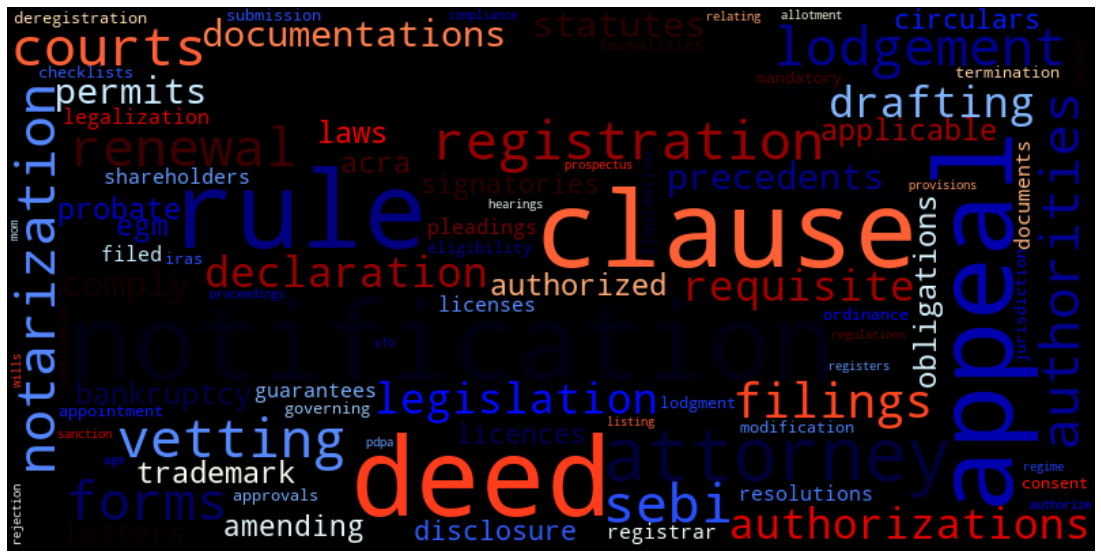

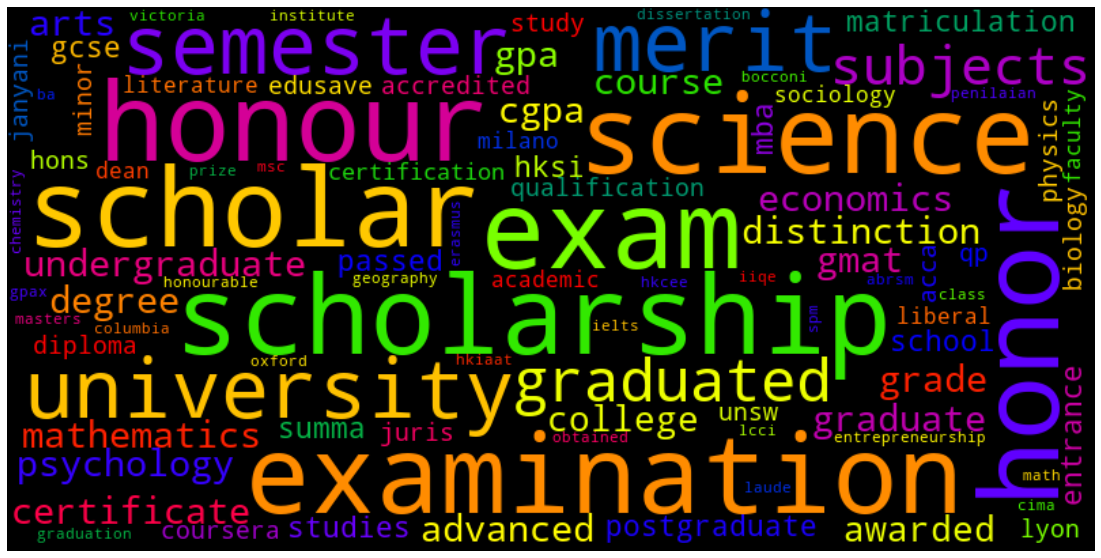

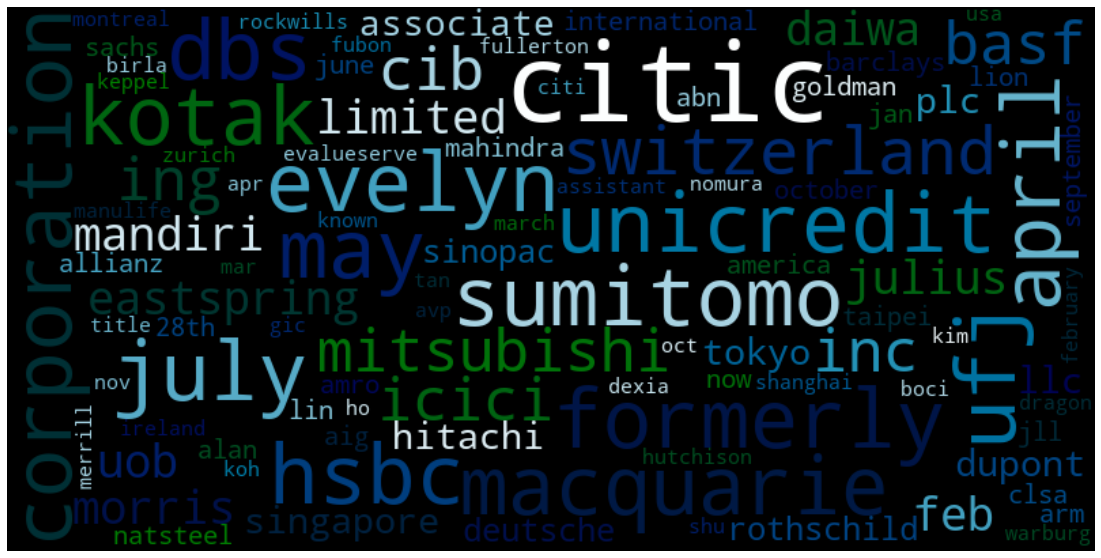

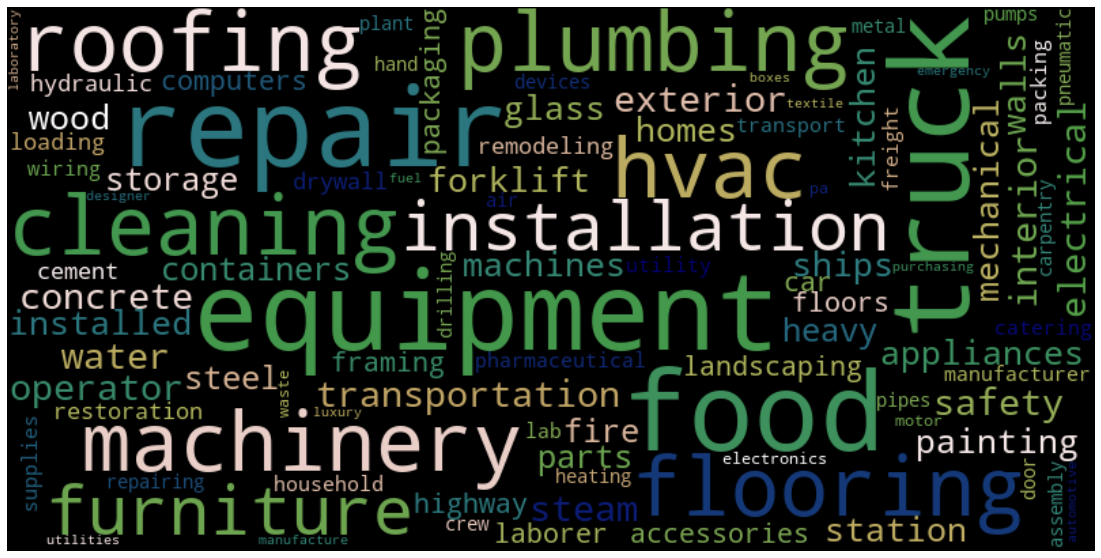

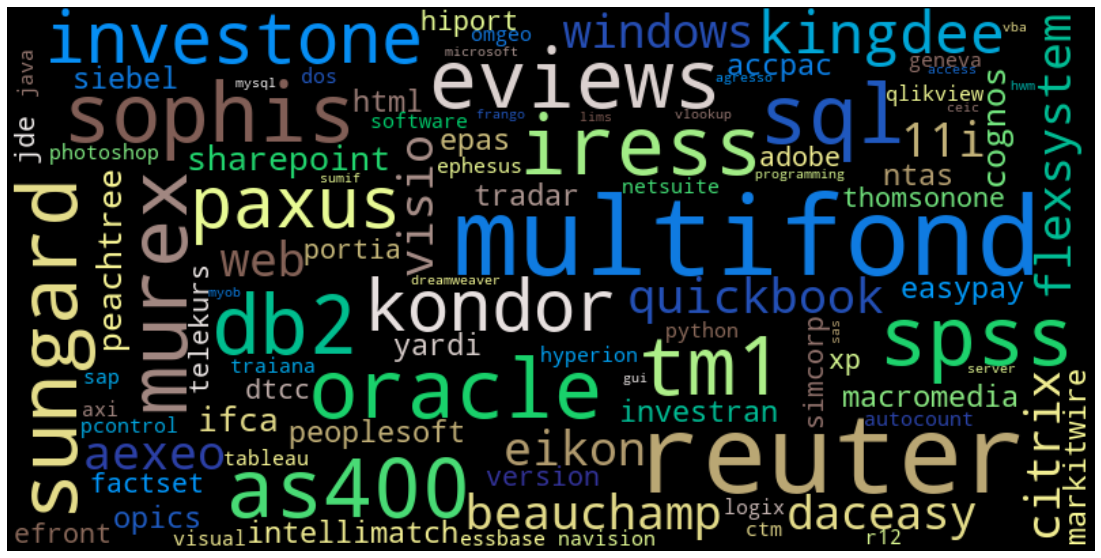

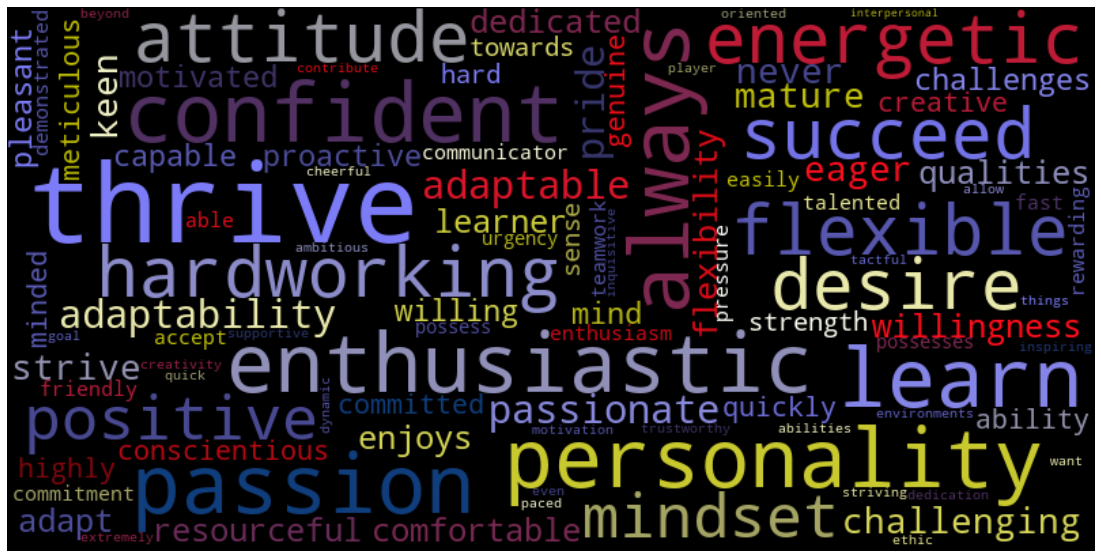

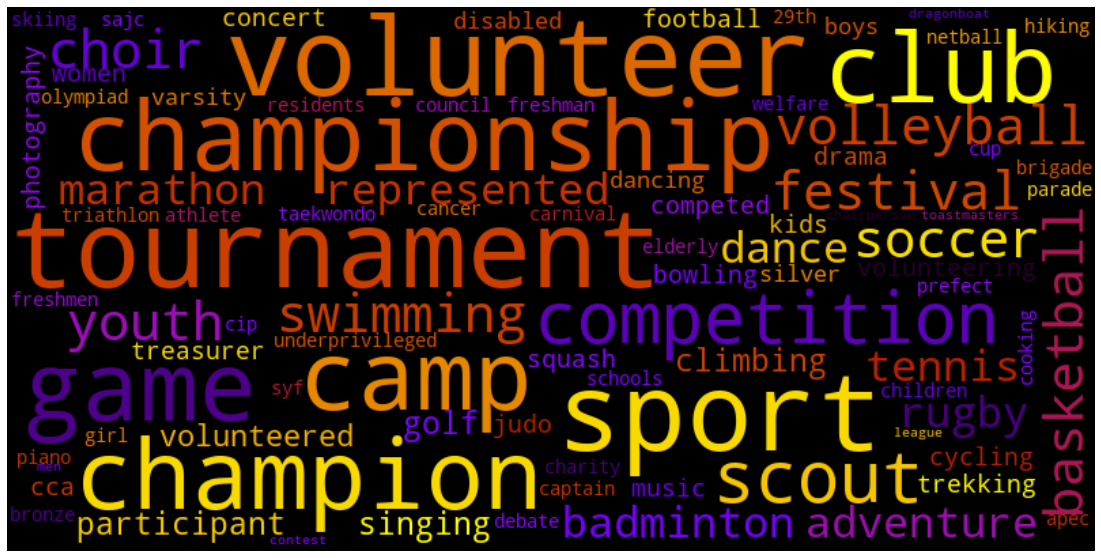

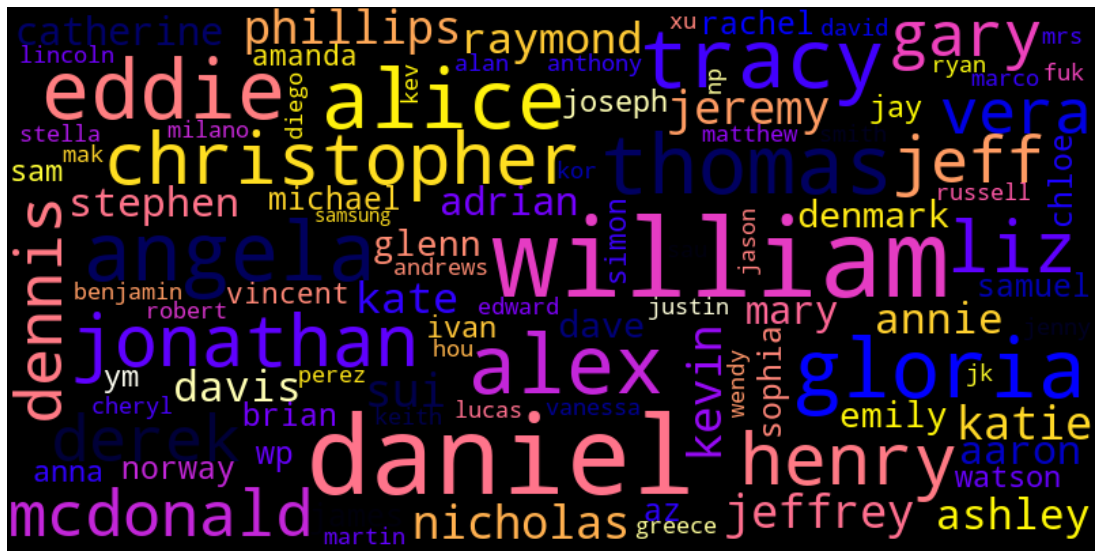

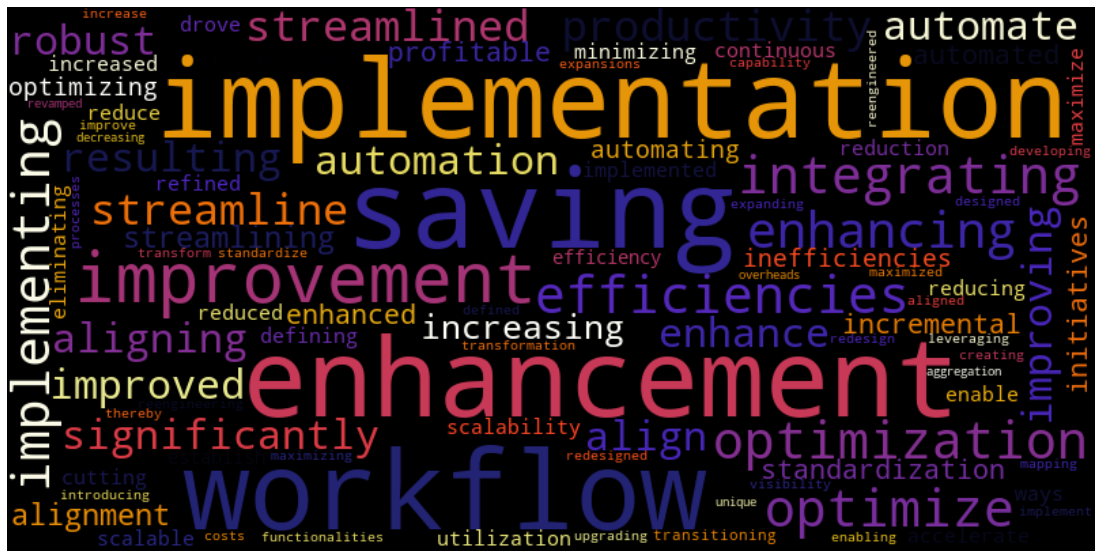

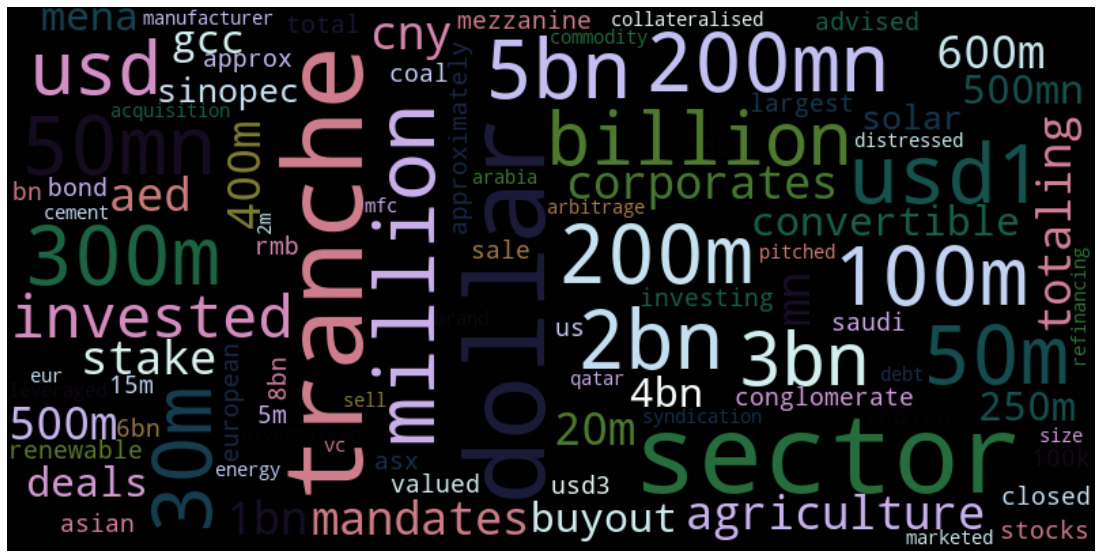

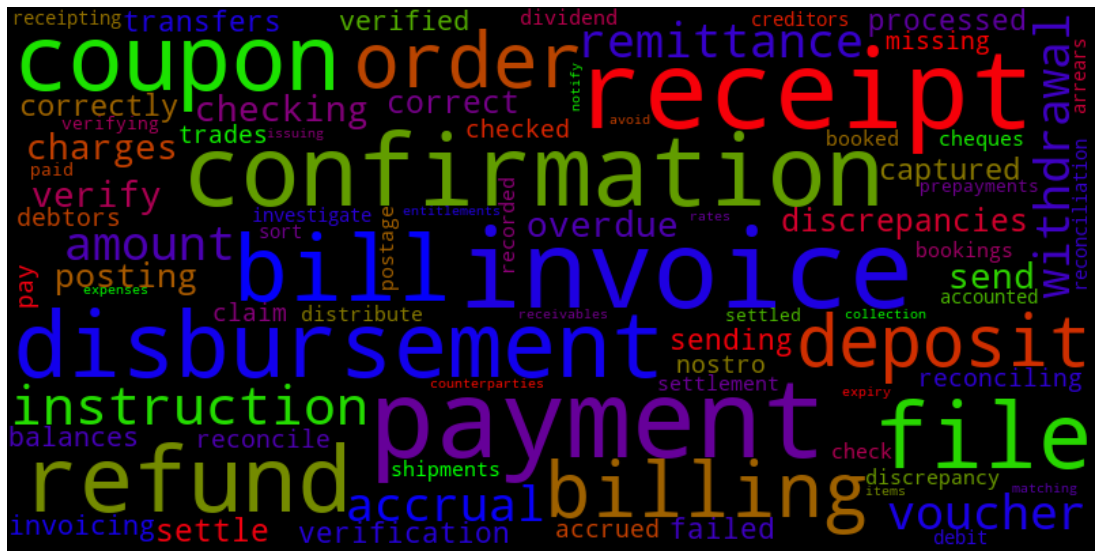

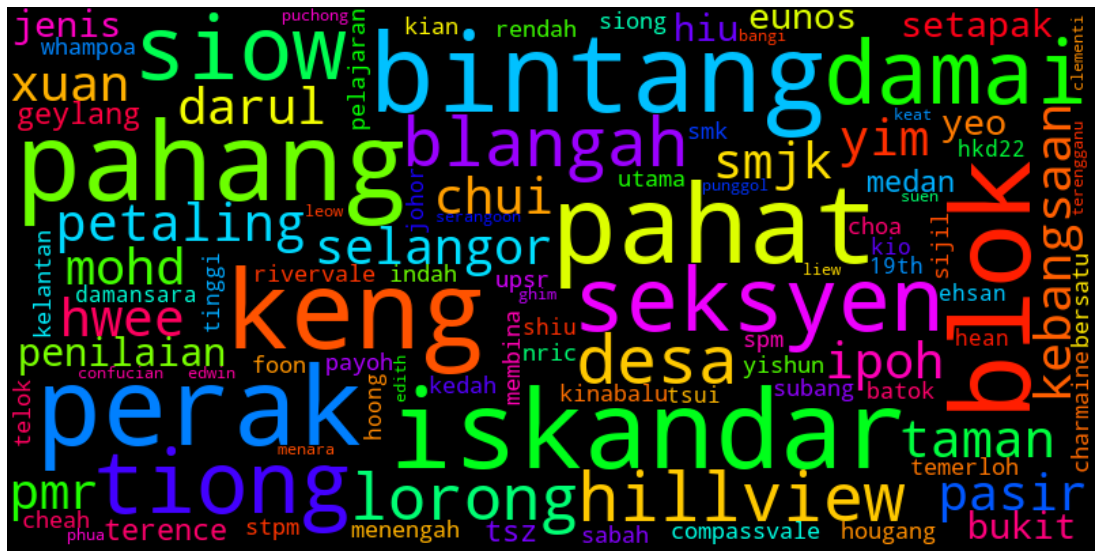

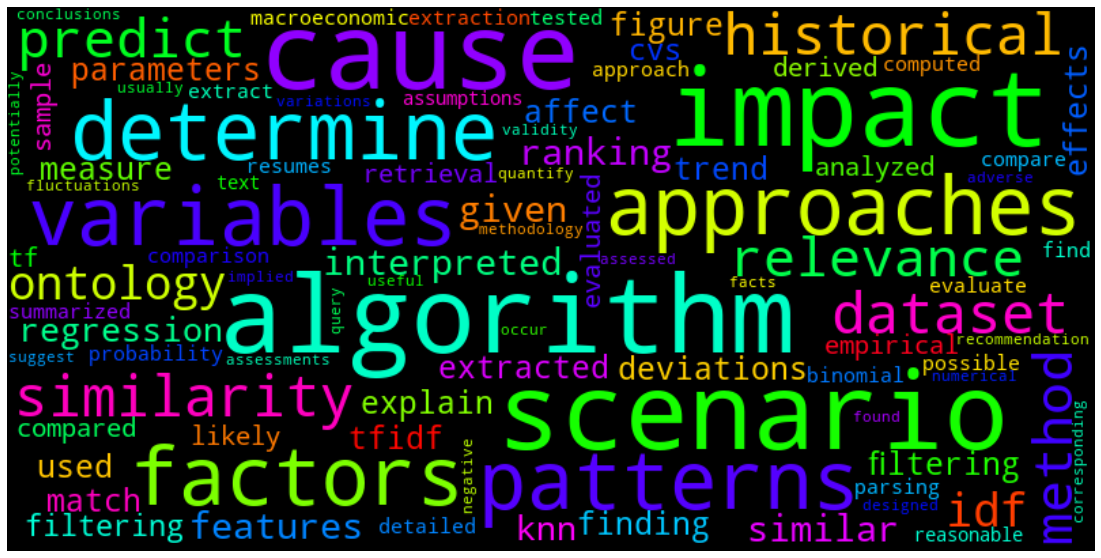

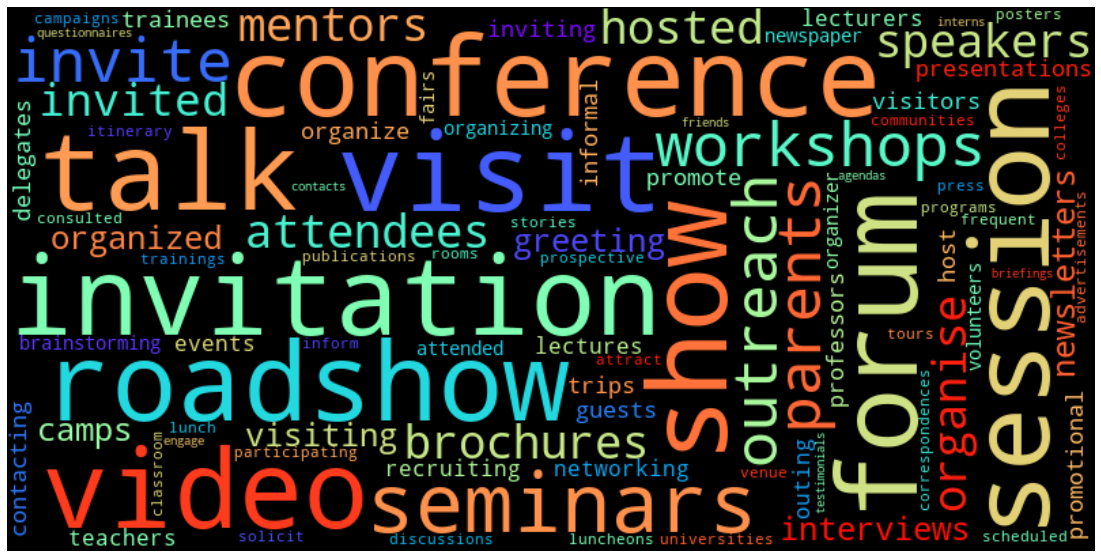

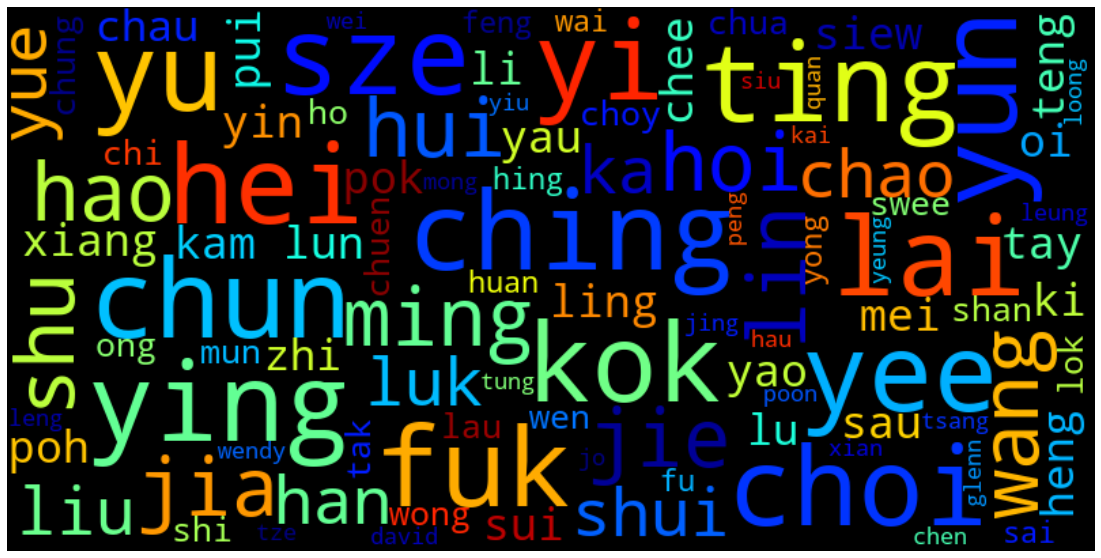

In [10]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from itertools import cycle

outputDir = projectDir + 'output/clusters/'
os.chdir(outputDir)

cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(15):
    col = next(cmaps)
    display_cloud(i+1, col)